# WeatherPy

## Findings
1. Temperatures are, on average, higher in the southern hemisphere (where is was summer at time of data collection) than the northern (where it was winter)
2. In general, the farther we get from the equator, the lower the temperatures.
3. 

✓ Analysis correctly describes 3 observable trends
✓ Analysis provides sound reasoning to back up why all 3 trends are occurring.
#After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

In [1]:
# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from datetime import date
from datetime import datetime
from scipy.stats import linregress
from scipy.stats import sem
from citipy import citipy
from ratelimit import limits
import requests

# Import weather API key
from api_keys import weather_api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Cities list

In [2]:
# List for holding lat_lngs and cities, response info, etc.
lat_lngs = []
cities = []
countries = []
dt = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
cities_lat = []
cities_lng = []
x = 1500
query_counter = 1
city_counter = 0
batch_counter = 1

# Set today's date
today = date.today()

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=x)
lngs = np.random.uniform(low=-180.000, high=180.000, size=x)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat/lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

603

### Perform API calls

In [4]:
# Perform a weather check on each city using a series of successive API calls.
# Loop through cities showing message if city is not found in the API
# Include a print log of each city as it is being processed

print("Beginning data retrieval")
print("-----------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    if query_counter < 60:
        query_counter = query_counter + 1
        if response['cod'] == '404':
            print("City not found. Skipping...")
        else:     
            countries.append(response['sys']['country']),          
            cities_lat.append(response['coord']['lat']),
            cities_lng.append(response['coord']['lon']), 
            dt.append(response['dt']),            
            max_temp.append(response['main']['temp_max']),
            humidity.append(response['main']['humidity']),
            cloudiness.append(response['clouds']['all']),
            wind_speed.append(response['wind']['speed']),
            print("Processing record " + str(city_counter) + " of batch " + str(batch_counter) + " | " + city),
            city_counter = city_counter + 1
    else:  
        print("Let's slow this roll...")
        query_counter = 0
        batch_counter = batch_counter + 1
        time.sleep(60)
        
print("-----------------------------")
print("Data retrieval complete")
print("-----------------------------")

Beginning data retrieval
-----------------------------
Processing record 0 of batch 1 | ahipara
Processing record 1 of batch 1 | mataura
Processing record 2 of batch 1 | laguna
Processing record 3 of batch 1 | coihaique
Processing record 4 of batch 1 | karratha
Processing record 5 of batch 1 | kavaratti
Processing record 6 of batch 1 | port lincoln
Processing record 7 of batch 1 | porto novo
Processing record 8 of batch 1 | iqaluit
Processing record 9 of batch 1 | hithadhoo
Processing record 10 of batch 1 | bathsheba
Processing record 11 of batch 1 | busselton
Processing record 12 of batch 1 | serebryansk
Processing record 13 of batch 1 | boden
Processing record 14 of batch 1 | tilichiki
Processing record 15 of batch 1 | sakaraha
Processing record 16 of batch 1 | asheville
City not found. Skipping...
Processing record 17 of batch 1 | puerto ayora
Processing record 18 of batch 1 | upernavik
City not found. Skipping...
Processing record 19 of batch 1 | hobart
Processing record 20 of batc

Processing record 173 of batch 4 | mahebourg
Processing record 174 of batch 4 | qui nhon
Processing record 175 of batch 4 | oga
Processing record 176 of batch 4 | georgetown
Processing record 177 of batch 4 | sarkand
Processing record 178 of batch 4 | kovdor
Processing record 179 of batch 4 | la ronge
Processing record 180 of batch 4 | motygino
Processing record 181 of batch 4 | saint anthony
Processing record 182 of batch 4 | ketchikan
Processing record 183 of batch 4 | banda aceh
Processing record 184 of batch 4 | luanda
Processing record 185 of batch 4 | simbahan
Processing record 186 of batch 4 | fukue
Processing record 187 of batch 4 | saldanha
Processing record 188 of batch 4 | karpathos
Processing record 189 of batch 4 | kruisfontein
Processing record 190 of batch 4 | rundu
Processing record 191 of batch 4 | henties bay
City not found. Skipping...
Processing record 192 of batch 4 | qaqortoq
Processing record 193 of batch 4 | takoradi
Processing record 194 of batch 4 | roald
Proc

Processing record 352 of batch 7 | alofi
City not found. Skipping...
Processing record 353 of batch 7 | laurel
Processing record 354 of batch 7 | honiara
Processing record 355 of batch 7 | doha
Processing record 356 of batch 7 | azul
Processing record 357 of batch 7 | yabrud
Processing record 358 of batch 7 | charters towers
City not found. Skipping...
Processing record 359 of batch 7 | summerville
Processing record 360 of batch 7 | sijunjung
Processing record 361 of batch 7 | yerbogachen
Processing record 362 of batch 7 | zalantun
Processing record 363 of batch 7 | belaya gora
Processing record 364 of batch 7 | soe
Processing record 365 of batch 7 | rocha
Processing record 366 of batch 7 | manggar
Processing record 367 of batch 7 | olinda
Processing record 368 of batch 7 | severo-yeniseyskiy
City not found. Skipping...
Processing record 369 of batch 7 | cape canaveral
Processing record 370 of batch 7 | yinchuan
Processing record 371 of batch 7 | harindanga
Processing record 372 of bat

Processing record 526 of batch 10 | ozernovskiy
Processing record 527 of batch 10 | pecos
Processing record 528 of batch 10 | labuan
Processing record 529 of batch 10 | nioro
Processing record 530 of batch 10 | port moresby
Processing record 531 of batch 10 | senanga
Processing record 532 of batch 10 | waddan
Processing record 533 of batch 10 | peniche
City not found. Skipping...
Processing record 534 of batch 10 | nadym
Processing record 535 of batch 10 | gopalpur
Processing record 536 of batch 10 | gladstone
Processing record 537 of batch 10 | aiken
Processing record 538 of batch 10 | tucuman
Processing record 539 of batch 10 | vilyuysk
Processing record 540 of batch 10 | kodinsk
Processing record 541 of batch 10 | charleston
City not found. Skipping...
-----------------------------
Data retrieval complete
-----------------------------


### Convert raw data to DataFrame

In [5]:
# Create and display DataFrame
df = pd.DataFrame(list(zip(cities, countries, cities_lat, cities_lng, dt, max_temp, humidity, cloudiness, wind_speed)), 
               columns =['City', 'Country', 'Latitude', 'Longitude', 'Datetime', 'Max. temperature (F)', 'Humidity (%)', 'Cloud coverage (%)', 'Wind speed (mph)']) 
df['City'] = df['City'].str.title()

#Convert datetime from Unix
df['Datetime'] = pd.to_datetime(df['Datetime'], unit='s')
df

,City,Country,Latitude,Longitude,Datetime,Max. temperature (F),Humidity (%),Cloud coverage (%),Wind speed (mph)
0,Ahipara,NZ,-35.17,173.17,2020-02-12 03:38:07,68.09,74,0,5.08
1,Mataura,NZ,-46.19,168.86,2020-02-12 03:38:07,64.00,76,78,5.99
2,Laguna,US,38.42,-121.42,2020-02-12 03:38:08,62.01,47,1,6.93
3,Coihaique,CL,-45.58,-72.07,2020-02-12 03:38:08,57.20,87,100,2.24
4,Karratha,AU,-20.74,116.85,2020-02-12 03:38:08,80.98,71,8,10.76
...,...,...,...,...,...,...,...,...,...
537,Magole,US,33.58,-81.60,2020-02-12 03:46:56,70.00,93,90,6.93
538,Hanzhong,AR,-26.82,-65.22,2020-02-12 03:48:16,68.00,88,90,4.74
539,Olympia,RU,63.76,121.62,2020-02-12 03:48:44,-9.74,95,99,7.54
540,Lindsay,RU,58.69,99.18,2020-02-12 03:48:45,0.12,95,65,1.07


In [10]:
# Export city data to CSV (and HTML for other assignment(s))
df.to_csv(r'cities.csv', encoding='utf-8')
df.to_html('cities.html')

### Plotting the data

#### Latitude vs. Temperature

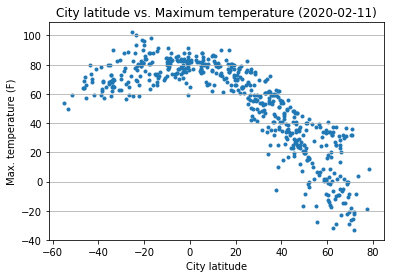

In [11]:
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.scatter(df.iloc[:, 2], df.iloc[:, 5], marker=".")
plt.title('City latitude vs. Maximum temperature' + ' (' + str(today) + ')')
plt.xlabel('City latitude')
plt.ylabel('Max. temperature (F)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('LatitudeTemperature.png')
plt.show()

#### Latitude vs. Humidity

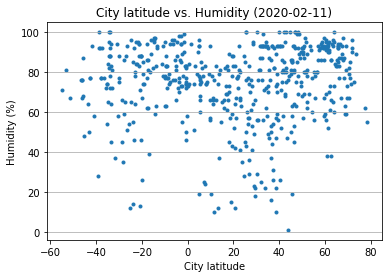

In [12]:
plt.scatter(df.iloc[:, 2], df.iloc[:, 6], marker=".")
plt.title('City latitude vs. Humidity' + ' (' + str(today) + ')')
plt.xlabel('City latitude')
plt.ylabel('Humidity (%)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('LatitudeHumidity.png')
plt.show()

#### Latitude vs. Cloud coverage

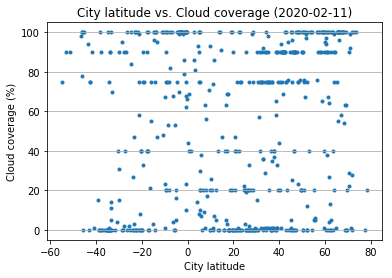

In [13]:
plt.scatter(df.iloc[:, 2], df.iloc[:, 7], marker=".")
plt.title('City latitude vs. Cloud coverage' + ' (' + str(today) + ')')
plt.xlabel('City latitude')
plt.ylabel('Cloud coverage (%)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('LatitudeCloudiness.png')
plt.show()

#### Latitude vs. Wind speed

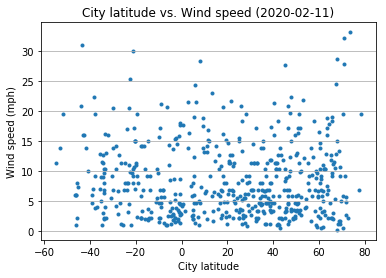

In [14]:
plt.scatter(df.iloc[:, 2], df.iloc[:, 8], marker=".")
plt.title('City latitude vs. Wind speed' + ' (' + str(today) + ')')
plt.xlabel('City latitude')
plt.ylabel('Wind speed (mph)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('LatitudeWindSpeed.png')
plt.show()

## Linear Regression

In [15]:
# Northern (greater than or equal to 0 degrees latitude) DataFrame
# Southern (less than 0 degrees latitude) DataFrame
df_northern = df.loc[df['Latitude'] >= 0]
df_southern = df.loc[df['Latitude'] < 0]

####  Northern Hemisphere - Max. temperature vs. Latitude linear regression

The r-squared value is: -0.8759428567557566


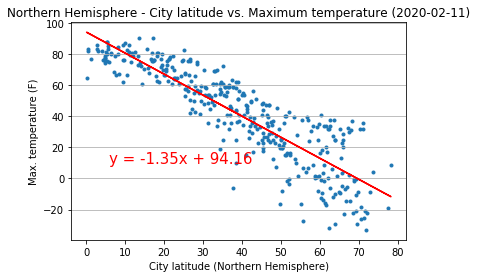

In [16]:
# Add the linear regression equation and line to plot

plt.scatter(df_northern.iloc[:, 2], df_northern.iloc[:, 5], marker=".")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_northern.iloc[:, 2], df_northern.iloc[:, 5])
regress_values = df_northern.iloc[:, 2] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(df_northern.iloc[:, 2],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - City latitude vs. Maximum temperature' + ' (' + str(today) + ')')
plt.xlabel('City latitude (Northern Hemisphere)')
plt.ylabel('Max. temperature (F)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('Northern_LatitudeTemperature.png')
print(f"The r-squared value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max. temperature vs. Latitude linear regression

The r-squared value is: 0.4891721723573449


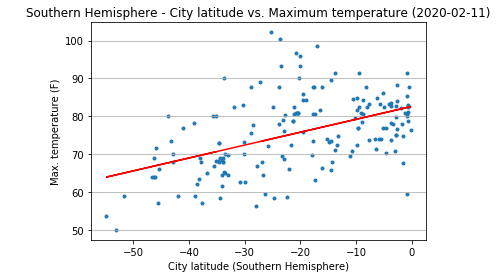

In [17]:
plt.scatter(df_southern.iloc[:, 2], df_southern.iloc[:, 5], marker=".")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_southern.iloc[:, 2], df_southern.iloc[:, 5])
regress_values = df_southern.iloc[:, 2] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(df_southern.iloc[:, 2],regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - City latitude vs. Maximum temperature' + ' (' + str(today) + ')')
plt.xlabel('City latitude (Southern Hemisphere)')
plt.ylabel('Max. temperature (F)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('Southern_LatitudeTemperature.png')
print(f"The r-squared value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude linear regression

The r-squared value is: 0.26990928690132643


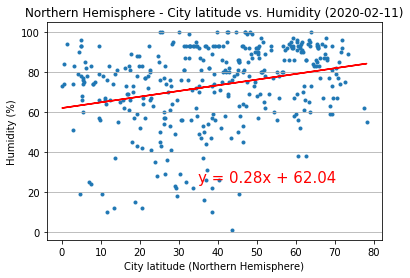

In [18]:
plt.scatter(df_northern.iloc[:, 2], df_northern.iloc[:, 6], marker=".")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_northern.iloc[:, 2], df_northern.iloc[:, 6])
regress_values = df_northern.iloc[:, 2] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(df_northern.iloc[:, 2],regress_values,"r-")
plt.annotate(line_eq,(35,25),fontsize=15,color="red")
plt.title('Northern Hemisphere - City latitude vs. Humidity' + ' (' + str(today) + ')')
plt.xlabel('City latitude (Northern Hemisphere)')
plt.ylabel('Humidity (%)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('Northern_LatitudeHumidity.png')
print(f"The r-squared value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude linear regression

The r-squared value is: 0.14899735767957178


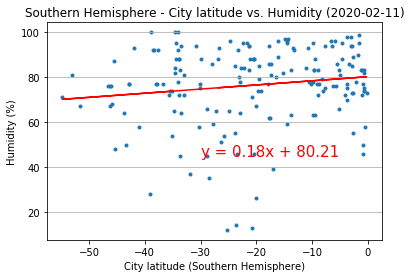

In [19]:
plt.scatter(df_southern.iloc[:, 2], df_southern.iloc[:, 6], marker=".")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_southern.iloc[:, 2], df_southern.iloc[:, 6])
regress_values = df_southern.iloc[:, 2] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(df_southern.iloc[:, 2],regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.title('Southern Hemisphere - City latitude vs. Humidity' + ' (' + str(today) + ')')
plt.xlabel('City latitude (Southern Hemisphere)')
plt.ylabel('Humidity (%)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('Southern_LatitudeHumidity.png')
print(f"The r-squared value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloud coverage (%) vs. Latitude linear regression

The r-squared value is: 0.2850962704662287


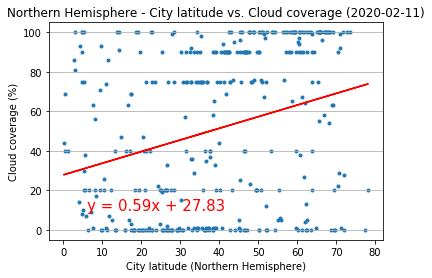

In [20]:
plt.scatter(df_northern.iloc[:, 2], df_northern.iloc[:, 7], marker=".")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_northern.iloc[:, 2], df_northern.iloc[:, 7])
regress_values = df_northern.iloc[:, 2] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(df_northern.iloc[:, 2],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - City latitude vs. Cloud coverage' + ' (' + str(today) + ')')
plt.xlabel('City latitude (Northern Hemisphere)')
plt.ylabel('Cloud coverage (%)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('Northern_LatitudeCloudiness.png')
print(f"The r-squared value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloud coverage (%) vs. Latitude linear regression

The r-squared value is: 0.270459896431142


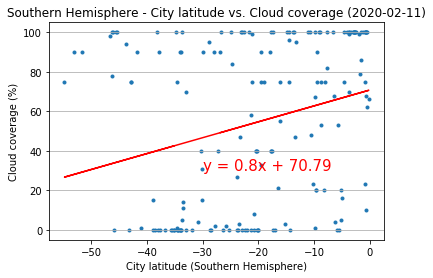

In [21]:
plt.scatter(df_southern.iloc[:, 2], df_southern.iloc[:, 7], marker=".")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_southern.iloc[:, 2], df_southern.iloc[:, 7])
regress_values = df_southern.iloc[:, 2] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(df_southern.iloc[:, 2],regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title('Southern Hemisphere - City latitude vs. Cloud coverage' + ' (' + str(today) + ')')
plt.xlabel('City latitude (Southern Hemisphere)')
plt.ylabel('Cloud coverage (%)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('Southern_LatitudeCloudiness.png')
print(f"The r-squared value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind speed (mph) vs. Latitude linear regression

The r-squared value is: 0.03588296831898539


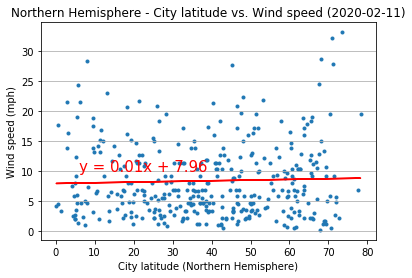

In [22]:
plt.scatter(df_northern.iloc[:, 2], df_northern.iloc[:, 8], marker=".")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_northern.iloc[:, 2], df_northern.iloc[:, 8])
regress_values = df_northern.iloc[:, 2] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(df_northern.iloc[:, 2],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - City latitude vs. Cloud coverage' + ' (' + str(today) + ')')
plt.title('Northern Hemisphere - City latitude vs. Wind speed' + ' (' + str(today) + ')')
plt.xlabel('City latitude (Northern Hemisphere)')
plt.ylabel('Wind speed (mph)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('Northern_WindSpeed.png')
print(f"The r-squared value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind speed (mph) vs. Latitude linear regression

The r-squared value is: -0.23309952734226194


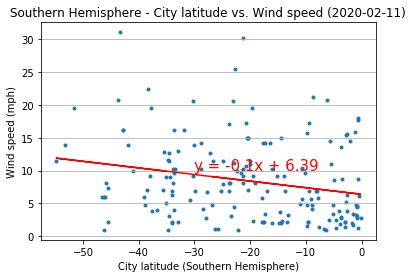

In [23]:
plt.scatter(df_southern.iloc[:, 2], df_southern.iloc[:, 8], marker=".")
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_southern.iloc[:, 2], df_southern.iloc[:, 8])
regress_values = df_southern.iloc[:, 2] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(df_southern.iloc[:, 2],regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - City latitude vs. Wind speed' + ' (' + str(today) + ')')
plt.xlabel('City latitude (Southern Hemisphere)')
plt.ylabel('Wind speed (mph)')
plt.grid(axis='y')
#plt.legend()

# Show and save figure
plt.savefig('Southern_WindSpeed.png')
print(f"The r-squared value is: {rvalue}")
plt.show()